# PHYS 281
# Homework 2
# Ian Knightly
# 3/31/23

## Libraries

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare
import scipy.stats as stats
import requests

## Part 1: Loading and Plotting the Data





### A

In [ ]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

response = requests.get(url)

if response.status_code == 200:
    txt_data = response.text
    print(txt_data[:500])
else:
    print(f"Error fetching data: {response.status_code}")

# save the data to a file

# with open("monthly_means.txt", "w") as file:
#     file.write(txt_data)
# print("File saved successfully!")   

In [ ]:
# Read the data from the file
co2_data = txt_data

year = co2_data[:,0]
month = co2_data[:,1]
decimal_date = co2_data[:,2]
monthly_avg = co2_data[:,3]
de_seasonalized = co2_data[:,4]
days = co2_data[:,5]
std_day = co2_data[:,6]
unc_mon_mean = co2_data[:,7]
print(f'\n Year: {year[0:5]}\n Month: {month[0:5]} \n Decimal Date: {decimal_date[0:5]} \n Monthly Average: {monthly_avg[0:5]} \n De-seasonalized: {de_seasonalized[0:5]} \n Days: {days[0:5]} \n Std. Dev. of Days: {std_day[0:5]} \n Unc. of Month Mean: {unc_mon_mean[0:5]}')


 Year: [1958. 1958. 1958. 1958. 1958.]
 Month: [3. 4. 5. 6. 7.] 
 Decimal Date: [1958.2027 1958.2877 1958.3699 1958.4548 1958.537 ] 
 Monthly Average: [315.7  317.45 317.51 317.24 315.86] 
 De-seasonalized: [314.43 315.16 314.71 315.14 315.18] 
 Days: [-1. -1. -1. -1. -1.] 
 Std. Dev. of Days: [-9.99 -9.99 -9.99 -9.99 -9.99] 
 Unc. of Month Mean: [-0.99 -0.99 -0.99 -0.99 -0.99]


In [ ]:
time = decimal_date
co2_conc = monthly_avg
error = unc_mon_mean
de_seas = de_seasonalized

### B

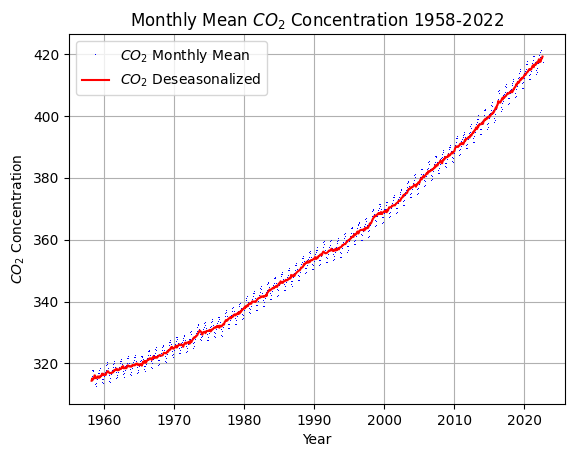

In [ ]:
plt.plot(time, co2_conc, 'b,', label = r'$CO_2$ Monthly Mean')
plt.plot(time,de_seas,'r-', label = r'$CO_2$ Deseasonalized')
plt.ylabel(r'$CO_2$ Concentration')
plt.xlabel('Year')
plt.title(r'Monthly Mean $CO_2$ Concentration 1958-2022')
plt.legend()
plt.grid()
plt.show()

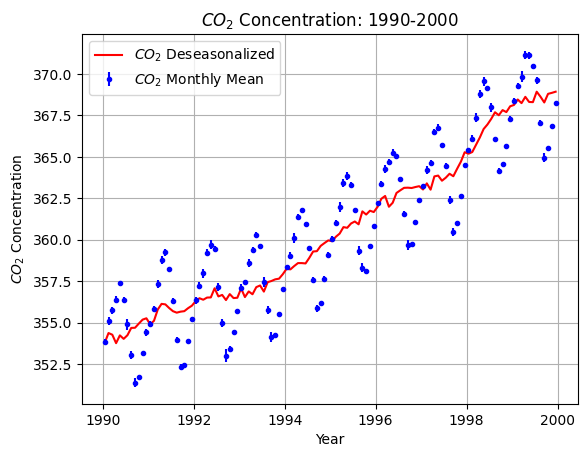

In [ ]:
t_90s = time[(time>1990.0) & (time<2000.0)]
co2_90s = co2_conc[382:502]
err_90s = error[382:502]
de_seas_90s = de_seas[382:502]

plt.plot(t_90s,de_seas_90s,'r-', label = r'$CO_2$ Deseasonalized')
plt.errorbar(t_90s, co2_90s, err_90s, fmt = 'b.', label = r'$CO_2$ Monthly Mean')
plt.ylabel(r'$CO_2$ Concentration')
plt.xlabel('Year')
plt.title(r'$CO_2$ Concentration: 1990-2000')
plt.legend()
plt.grid()
plt.show()

# index_first = np.where(time>1990.0)[0][0]
# index_last = np.where(time<2000.0)[-1][-1]
# print(f'{index_first},{index_last}')
# print(f'First Year: {t_90s[0]}, Last Year: {t_90s[-1]}')

### C




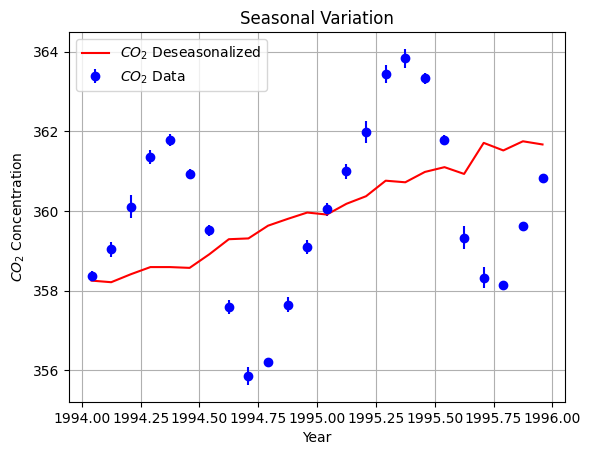

In [ ]:
t_94_96 = time[(time>1994.0) & (time<1996.0)]
co2_94_96 = co2_conc[430:454]
err_94_96 = error[430:454]
de_seas_94_96 = de_seas[430:454]

plt.errorbar(t_94_96, co2_94_96, err_94_96, fmt = 'bo', label = r'$CO_2$ Data')
plt.plot(t_94_96, de_seas_94_96, 'r-', label = r'$CO_2$ Deseasonalized')
plt.ylabel(r'$CO_2$ Concentration')
plt.xlabel('Year')
plt.title(r'Seasonal Variation')
plt.legend()
plt.grid()
plt.show()

# index_first = np.where(time>1994.0)[0][0]
# index_last = np.where(time<1996.0)[-1][-1]
# print(f'{index_first},{index_last}')
# print(f'First Year: {t_94_96[0]}, Last Year: {t_94_96[-1]}')

Answer: The amplitude is around the midpoint of the y-axis. so, it's about 359.The source of the oscillation is the Keeling Curve. When you look at the data set, the error is typically lower around Co2 level 359.

### D

t: [1959.49725833 1960.49819167 1961.49725833 1962.49725833 1963.49725833]
c: [315.98083333 316.91       317.64416667 318.45416667 318.9925    ]
e: [-0.99 -0.99 -0.99 -0.99 -0.99]
t: 63
c: 63
e: 63


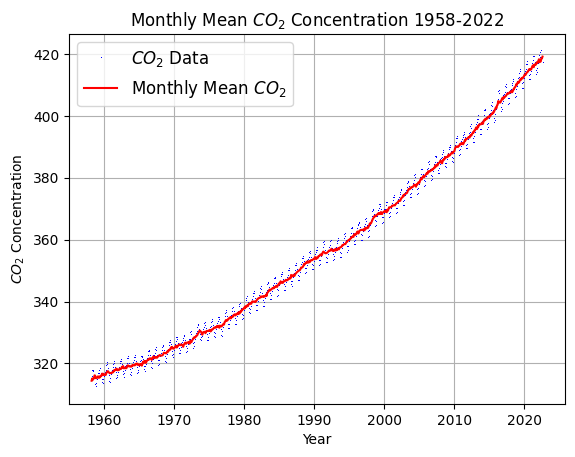

In [ ]:
time_1D = time[(time>1959.0) & (time<2022.0)]

co2_1D = co2_conc[10:766]
error_1D = error[10:766]
  
n = 12 
t = np.array([np.mean(time_1D[i:i + n]) for i in range(0, len(time_1D), n)])
c = np.array([np.mean(co2_1D[i:i + n]) for i in range(0, len(co2_1D), n)])
e = np.array([np.mean(error_1D[i:i + n]) for i in range(0, len(error_1D), n)])
print(f't: {t[0:5]}\nc: {c[0:5]}\ne: {e[0:5]}')
print(f't: {len(t)}\nc: {len(c)}\ne: {len(e)}')
plt.plot(time, co2_conc, 'b,', label = r'$CO_2$ Data')
# plt.plot(time, de_seas, 'r-', label = r'$CO_2$ Deseasonalized')
plt.plot(time, de_seas, 'r-', label = r'Monthly Mean $CO_2$')
plt.ylabel(r'$CO_2$ Concentration')
plt.xlabel('Year')
plt.title(r'Monthly Mean $CO_2$ Concentration 1958-2022')
plt.legend(fontsize=12)
plt.grid()
plt.show()

# index_first = np.where(time>1959.0)[0][0]
# index_last = np.where(time<2022.0)[-1][-1]
# print(f'{index_first},{index_last}')
# print(f'First Year: {time[0]}, Last Year: {time[-1]}')
# print(f'\n Time: {t[30:35]}\n Co2: {c[30:35]} \n Error: {e[30:35]}')
# print(f'\n Time: {len(t)}\n Co2: {len(c)} \n Error: {len(e)}') 

Answer: As you can see in the plot above, the average Co2 levels that I calculated closely matches the Co2 Deseasonalized values.

## Part 2. Linear and Quadratic fits

### A

In [ ]:
error[error==-0.99]=np.max(error)
error[error==0]=np.max(error)
print(f'Max Error: {np.max(error)}')
print(f'First 10: {error[0:10]}')

Max Error: 0.58
First 10: [0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]


Answer: I chose the maximum error value 0.58 to replace the -0.99 values running from 1958 to 1974 and the 0 value in the middle of the data set, because the maximum value significantly lowers the reduced chi-square value.

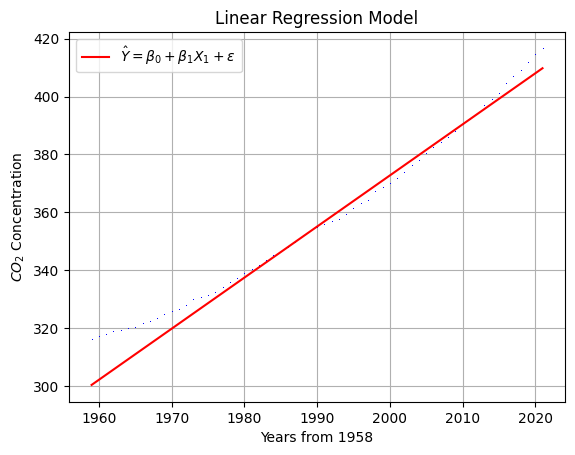

b0 and b1 based on my calculations.
b0: -2854.571268187277 b1: 1.6140252976187695

reduced chi-squared = 154.23936424255578
parameters and 1-sigma parameter uncertainties:
p0 = -3158.69258 +/- 49.10615
p1 = 1.76569 +/- 0.02460


In [ ]:
n = 12
year = year[(year>1958) & (year<2022)]
t = np.array([np.mean(year[i:i + n]) for i in range(0, len(year), n)])
new_time = np.array([time[i]-time[0] for i in range(0,len(time))])
X=t
X.astype(int)
Y=c
yerr = e

def lm(x, b0, b1):
  return b0+b1*x

nn = len(Y)
pp = 2

Xbar = np.mean(X)
Ybar = np.mean(Y)
param1 = np.sum(X*(Y-Ybar)/np.sum(X*(X-Xbar)))
param0 = Ybar-param1*Xbar


guesses = (305.51554266656495,1.611760244519701)
(b0,b1),cc = curve_fit(lm,X,Y,p0=guesses,sigma=yerr)
(ub0,ub1) = np.sqrt(np.diag(cc))
yfit1 = lm(X,b0,b1)

yys1 = (yfit1-Y)**2/yerr**2
chisqr1 = np.sum(yys1)/(nn-pp)

xmod = np.linspace(X[0],X[-1],100)
ymod = lm(xmod,b0,b1)
plt.plot(X,Y,'b,')
plt.plot(xmod,ymod, 'r-', label = r'$\hat{Y}=\beta_0+\beta_1X_1+\varepsilon$')
plt.title('Linear Regression Model')
plt.xlabel('Years from 1958')
plt.ylabel(r'$CO_2$ Concentration')
plt.legend()
plt.grid()
plt.show()

# report results
print('b0 and b1 based on my calculations.')
print(f'b0: {param0} b1: {param1}\n')
print('reduced chi-squared =',chisqr1)
print('parameters and 1-sigma parameter uncertainties:')
print(f'p0 = {b0:3.5f} +/- {ub0:3.5f}')  # use f-strings
print(f'p1 = {b1:3.5f} +/- {ub1:3.5f}')


Answer: In the linear regression model, I used the standard formulas for finding $b_0$ and $b_1$ to formulate my guesses for the curve_fit model. This resulted in  curve_fit model finding the optimal parameters for the linear regression model. However, the linear regression model is not the optimal model for this data set. At the origin and end of the model it is not properly fitted to the data. Also, the chi square for the linear regression model is pretty high.

### B

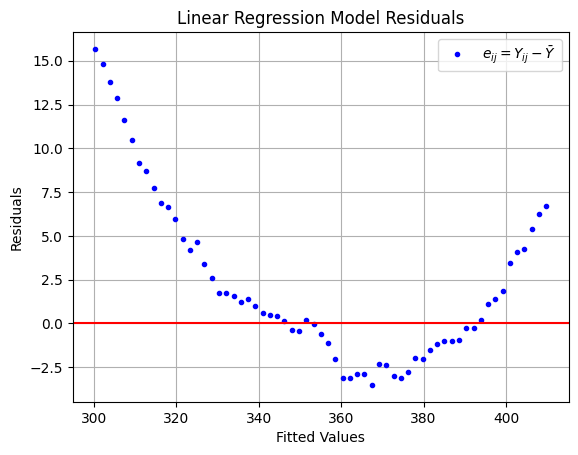

In [ ]:
e1 = Y-yfit1

plt.plot(yfit1,e1, 'b.', label = r'$e_{ij}=Y_{ij}-\bar{Y}$')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Linear Regression Model Residuals')
plt.legend()
plt.grid()
plt.show()

Answer: The residuals here have a specific pattern, and are quadratic in shape. A good set of residuals are usually randomized, and have no specific pattern. Concurrently, it's best when a good portion of the residuals are clustered and spread across the 0 horizontal line. You don't see that here.

### C

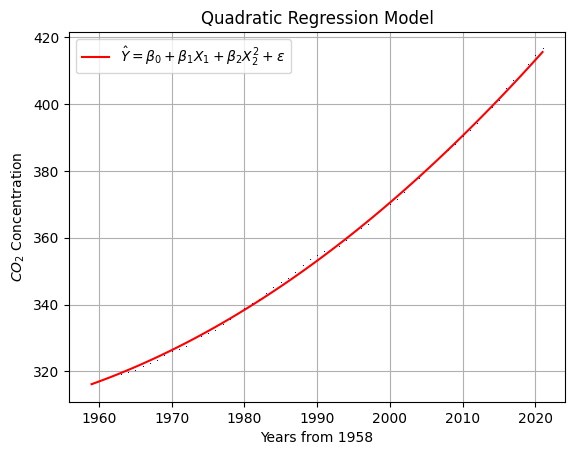

reduced chi-squared = 14.117577843604392
parameters and 1-sigma parameter uncertainties:
p0 = 49747.89809 +/- 2148.46527
p1 = -51.24482 +/- 2.15265
p2 = 0.01328 +/- 0.00054


In [ ]:
def f(x,p0,p1,p2):
  return p0+p1*x+p2*x**2

nn = len(Y)
pp = 3
guesses = (315,1.6,.01)
(p0,p1,p2),cc = curve_fit(f,X,Y,p0=guesses,sigma=yerr)
(up0,up1,up2) = np.sqrt(np.diag(cc))
yfit2 = f(X,p0,p1,p2)

yys2 = (yfit2-Y)**2/yerr**2
chisqr2 = np.sum(yys2)/(nn-pp)

xmod = np.linspace(X[0],X[-1],100)      
ymod = f(xmod,p0,p1,p2)

plt.plot(X,Y,'b,')
plt.plot(xmod,ymod,'r-', label = r'$\hat{Y}=\beta_0+\beta_1X_1+\beta_2X_2^2+\varepsilon$')             
plt.title('Quadratic Regression Model')
plt.xlabel('Years from 1958')
plt.ylabel(r'$CO_2$ Concentration')
plt.legend()
plt.grid()
plt.show()

print('reduced chi-squared =',chisqr2)
print('parameters and 1-sigma parameter uncertainties:')
print(f'p0 = {p0:3.5f} +/- {up0:3.5f}')  
print(f'p1 = {p1:3.5f} +/- {up1:3.5f}')
print(f'p2 = {p2:3.5f} +/- {up2:3.5f}')

Answer: This quadratic regression model is a significant improvement from the linear regression model. It's properly fitted to the data and has a much lower reduced chi square.

### D

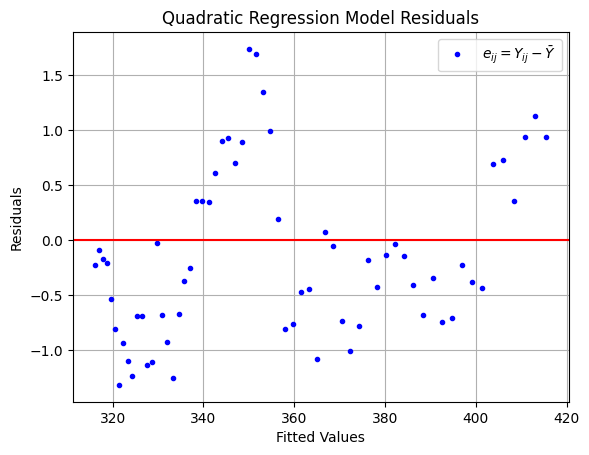

In [ ]:
e2 = Y-yfit2

plt.plot(yfit2,e2, 'b.', label = r'$e_{ij}=Y_{ij}-\bar{Y}$')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Quadratic Regression Model Residuals')
plt.legend()
plt.grid()
plt.show()

Answer: This is a good set of residuals here. They are randomized, and a decent portion of them are clustered and spread across the 0 horizontal line. Overall, they are superior to the residuals in the linear regression model.  

### E

In [ ]:
Y=de_seas
e1 = Y-yfit1
e2 = Y-yfit2
plt.plot(yfit1,e1, 'b.', label = 'Linear Model Residuals')
plt.plot(yfit2,e2, 'y.', label = 'Quadratic Model Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Linear Regression vs. Quadratic Regression Residuals')
plt.legend()
plt.grid()
plt.show()

print(f'Linear model reduced chi-squared = {chisqr1}\nQuadratic model reduced chi-squared = {chisqr2}')
print('Reduced chi-squared for quadratic regression model is superior.')

ValueError: ignored

In [ ]:
plt.hist(e1,color='blue',rwidth=0.8, label = 'Linear Model Residuals')
plt.hist(e2,color='yellow',rwidth=0.8, label = 'Quadratic Model Residuals')
plt.title('Linear Regression vs. Quadratic Regression Residuals')
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.legend()
plt.show()

Answer: It's very obvious when you compare the two residuals plots that the quadratic regression residuals are better. The linear regression residuals have a distinct quadratic pattern to them. Residuals are supposed to be random in behavior. That random behavior in the quadratic regression residuals is evident. Also, when you compare the reduced chi-squared for each model, notice that the quadratic regression model has a much lower reduced chi-squared. Therefore, the quadratic regression model is superior to the linear regression model.

### F

In [ ]:
def f(x,p0,p1,p2):
  y = p0+p1*x+p2*x**2
  return y

nn = len(X)
pp = 3
guesses = (315,1,1)
(p0,p1,p2),cc = curve_fit(f,X,Y,p0=guesses,sigma=yerr)
(up0,up1,up2) = np.sqrt(np.diag(cc))
yfit2 = f(X,p0,p1,p2)
yys = (yfit2-Y)**2/yerr**2
chisqr = sum(yys)/(nn-pp)

# plot data and model together
xmod = np.linspace(X[0],X[-1],100)       # assumes x's are in order
ymod = f(xmod,p0,p1,p2)

# plt.figure(figsize=(6,10))
# plt.rc('font', size=8)

plt.subplot(211)
plt.plot(X,Y,'b,')
plt.plot(xmod,ymod,'r-')                  # plot the model
plt.title('Quadratic Regression Model')
plt.xlabel('Time in Years')
plt.ylabel('Co2 Concentration')
plt.grid()



time_1D = time[(time>1959.0) & (time<2022.0)]

co2_1D = co2_conc[10:766]
error_1D = error[10:766]
  
n = 12 
t = [np.mean(time_1D[i:i + n]) for i in range(0, len(time_1D), n)]
c = [np.mean(co2_1D[i:i + n]) for i in range(0, len(co2_1D), n)]
e = [np.mean(error_1D[i:i + n]) for i in range(0, len(error_1D), n)]

plt.subplot(212)
plt.plot(time, co2_conc, 'b,', label = 'Co2 Data')
plt.plot(t, c, 'r-', label = 'Average Co2')
plt.plot(time, de_seas, 'y--', label = 'Co2 Deseasonalized')
plt.ylabel('Co2 Concentration')
plt.xlabel('Time in Years')
plt.title('Co2 v. Time: 1959-2022')
plt.legend(fontsize=12)
plt.grid()


ValueError: ignored

Answer: When you compare the quadratic fit to the running average, it's evident that the model is accurate, because the model closely resembles the running average.

## Part 3. Projecting future CO2 levels

### A

In [ ]:
nn = len(X)
pp = 2

Xbar = np.mean(X)
Ybar = np.mean(Y)
param1 = np.sum(X*(Y-Ybar)/np.sum(X*(X-Xbar)))
param0 = Ybar-param1*Xbar


guesses = (305.51554266656495,1.611760244519701)
(b0,b1),cc = curve_fit(lm,X,Y,p0=guesses,sigma=yerr)
(ub0,ub1) = np.sqrt(np.diag(cc))
yfit1 = lm(X,b0,b1)
yys = (yfit1-Y)**2/yerr**2
chisqr = sum(yys)/(nn-pp)  

xmod = np.linspace(X[0],X[-1],100)
ymod = lm(xmod,b0,b1)
time_extended = np.arange(0,100,1)
line = [b1*xi + b0 for xi in time_extended]

plt.plot(X,Y,'b,')
plt.plot(time_extended,line, 'r-', label = r'$\hat{Y}=\beta_0+\beta_1X_1+\varepsilon$')
plt.title('Linear Regression Model: Prediction 100 Years')
plt.xlabel('Years from 1958')
plt.ylabel(r'$CO_2$ Concentration')
plt.grid()
plt.legend()

# report results
print('b0 and b1 based on my calculations.')
print(f'b0: {param0} b1: {param1}\n')
print('reduced chi-squared =',chisqr)
print('parameters and 1-sigma parameter uncertainties:')
print(f'p0 = {b0:3.5f} +/- {ub0:3.5f}')  # use f-strings
print(f'p1 = {b1:3.5f} +/- {ub1:3.5f}')
print(f'Average Co2 Level at t=100 years: {np.max(line):3.5f}')

In [ ]:
def f(x,p0,p1,p2):
  y = p0+p1*x+p2*x**2
  return y

nn = len(X)
pp = 3
guesses = (305.51554266656495,1.6,1)
(p0,p1,p2),cc = curve_fit(f,X,Y,p0=guesses,sigma=yerr)
(up0,up1,up2) = np.sqrt(np.diag(cc))
yfit2 = f(X,p0,p1,p2)
yys = (yfit2-Y)**2/yerr**2
chisqr = sum(yys)/(nn-pp)

# plot data and model together
xmod = np.linspace(X[0],X[-1],100)       # assumes x's are in order
ymod = f(xmod,p0,p1,p2)
time_extended = np.arange(0,100,1)
line = [p2*xi**2 + p1*xi + p0 for xi in time_extended]


plt.plot(X,Y,'b,')
plt.plot(time_extended,line,'r-', label = r'$\hat{Y}=\beta_0+\beta_1X_1+\beta_2X_2^2+\varepsilon$')                  # plot the model
plt.title('Quadratic Regression Model: Prediction 100 Years')
plt.xlabel('Years from 1958')
plt.ylabel(r'$CO_2$ Concentration')
plt.grid()
plt.legend()

# report results
print('reduced chi-squared =',chisqr)
print('parameters and 1-sigma parameter uncertainties:')
print(f'p0 = {p0:3.5f} +/- {up0:3.5f}')  # use f-strings
print(f'p1 = {p1:3.5f} +/- {up1:3.5f}')
print(f'p2 = {p2:3.5f} +/- {up2:3.5f}')
print(f'Average Co2 Level at t=100 years: {np.max(line):3.5f}')

Answer: From what what you can see, the quadratic regression maintains a closer fit to the data and it has a lower reduced chi square. As a result, it's predictions are more accurate than the linear regression. It predicts a higher average Co2 level occurring in 2058.